Set your own project path

In [1]:
project_path = '/Users/EB/Google Drive/Projects/breweries'

Import modules

In [2]:
import pickle
import os
import textacy
import pylab

Load beer review example and create corpus

In [3]:
os.chdir(project_path + '/data/')
data = pickle.load(open('reviews_sample.p', 'rb'))

# create beer reviews corpus
corpus = textacy.Corpus('en', texts = data[1], metadatas = data[0])

### Term Document Model
This is the textacy introduction example from http://textacy.readthedocs.io/.

Changes: dictionaries are used to pass the parameters which increases readability.

In [4]:
# specifications for terms list and document term matrix
tl_specs = {'ngrams': 1,
            'named_entities': False,
            'as_strings': True}

tl = (doc.to_terms_list(**tl_specs) for doc in corpus)

dtm_specs = {'terms_lists': tl, 
             'weighting': 'tfidf',
             'normalize': 'True',
             'smooth_idf': 'True',
             'min_df': 2,
             'max_df': 0.95}

In [5]:
# create document term matrix
dtm, id2t = textacy.vsm.doc_term_matrix(**dtm_specs)

In [6]:
# create topic model with 5 topics
model = textacy.tm.TopicModel('nmf', n_topics = 5)
model.fit(dtm)

In [7]:
# show top 6 terms for topics
for topic_idx, top_terms in model.top_topic_terms(id2t, top_n = 6):
    print('Topic', topic_idx + 1, ':', ", ".join(top_terms))

Topic 1 : hop, yeast, malt, citrus, belgian, light
Topic 2 : pumpkin, spice, pie, cinnamon, nutmeg, ale
Topic 3 : sour, raspberry, cherry, tart, funk, oak
Topic 4 : beer, ', not, like, good, think
Topic 5 : dark, chocolate, brown, coffee, malt, caramel


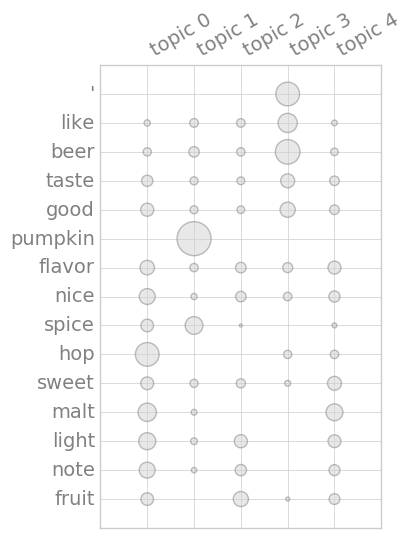

In [8]:
# termite plot
model.termite_plot(doc_term_matrix = dtm, id2term = id2t, n_terms = 15)
pylab.show()